In [12]:
import numpy as np
import pandas as pd

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
df = pd.read_csv('/content/drive/MyDrive/SWING/HOMERUN/merged_foot_traffic.csv')

In [15]:
footTraffic = df.copy()
footTraffic.head()

,자치구,측정날짜,방문자수
0,Dobong-gu,2023-01-01,832.0
1,Eunpyeong-gu,2023-01-01,8.0
2,Yangcheon-gu,2023-01-01,555.0
3,Gangbuk-gu,2023-01-01,457.0
4,Songpa-gu,2023-01-01,122.0


In [16]:
footTraffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3509 entries, 0 to 3508
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   자치구     3509 non-null   object 
 1   측정날짜    3509 non-null   object 
 2   방문자수    3509 non-null   float64
dtypes: float64(1), object(2)
memory usage: 82.4+ KB


In [17]:
footTraffic['측정날짜'] = pd.to_datetime(footTraffic['측정날짜'])
footTraffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3509 entries, 0 to 3508
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   자치구     3509 non-null   object        
 1   측정날짜    3509 non-null   datetime64[ns]
 2   방문자수    3509 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 82.4+ KB


In [18]:
Gangnam_filtered_df = footTraffic[footTraffic['자치구'] == 'Gangnam-gu']

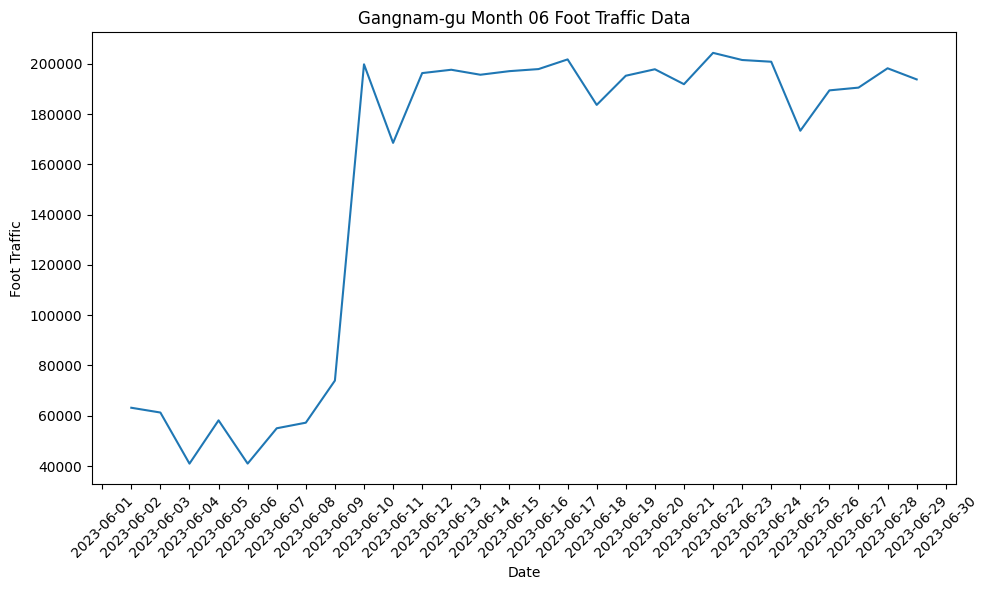

In [38]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 날짜 구간 선택
start_date = pd.to_datetime('2023-06-01')
end_date = pd.to_datetime('2023-06-30')
Gangnam_selected_df = Gangnam_filtered_df[(Gangnam_filtered_df['측정날짜'] > start_date) & (Gangnam_filtered_df['측정날짜'] < end_date)]

# 그래프 설정
fig, ax = plt.subplots(figsize=(10, 6))

# misemunji 칼럼 생성하든어쩌든 하기
ax.plot(Gangnam_selected_df['측정날짜'], Gangnam_selected_df['방문자수'])
ax.set_xlabel('Date')
ax.set_ylabel('Foot Traffic')
ax.set_title('Gangnam-gu Month 06 Foot Traffic Data')

# x축 눈금 설정
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
# plt.rcParams.update({'font.size': 12, 'font.family': 'NanumGothic'})
plt.tight_layout()

# 그래프 출력
plt.show()

In [23]:
# 한글, - 표기문제
# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
# ## 폰트 깨짐 문제 해결##
# # 필요 라이브러리 불러오기
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가

In [21]:
# # 측정날짜를 datetime 형식으로 변환
# Gangnam_selected_df['측정날짜'] = pd.to_datetime(Gangnam_selected_df['측정날짜'])

# # 필터링을 위한 날짜 범위 설정
# start_date = pd.to_datetime('2023-06-10')
# end_date = pd.to_datetime('2023-07-02')

# # 필터링된 데이터 추출
# filtered_df = Gangnam_selected_df[(Gangnam_selected_df['자치구'] == 'Gangnam-gu') & (Gangnam_selected_df['측정날짜'] >= start_date) & (Gangnam_selected_df['측정날짜'] <= end_date)]

# # 그래프 설정
# fig, ax = plt.subplots()
# ax.plot(filtered_df['측정날짜'], filtered_df['방문자수'], marker='o')
# ax.set_xlabel('측정날짜')
# ax.set_ylabel('방문자수')
# ax.set_title('Gangnam-gu 방문자수 및 측정날짜')

# # x축 눈금 설정
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# plt.xticks(rotation=45)
# plt.rcParams.update({'font.size': 12, 'font.family': 'NanumGothic'})
# plt.tight_layout()

# # 그래프 출력
# plt.show()

In [22]:
# plt.plot(Gangnam_selected_df['측정날짜'], Gangnam_selected_df['방문자수'])
# plt.xlabel('측정날짜')
# plt.ylabel('방문자수')
# plt.title('강남구 일일 방문자수')
# plt.xticks(rotation=45)
# plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정
# plt.rcParams['axes.unicode_minus'] = False # 마이너스 보이게 하기
# plt.show()

- 강남구를 뽑은 이유: 유동인구가 가장많아서라고함. max를 뽑아내는 코드 작성하기
- 강수량-유동인구 간의 상관계수 계산하기